# CBE 562 Midterm 2

#### Tyson Wheelwright

I'm importing the libraries I need in Python.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Problem 1: Competing Reactions

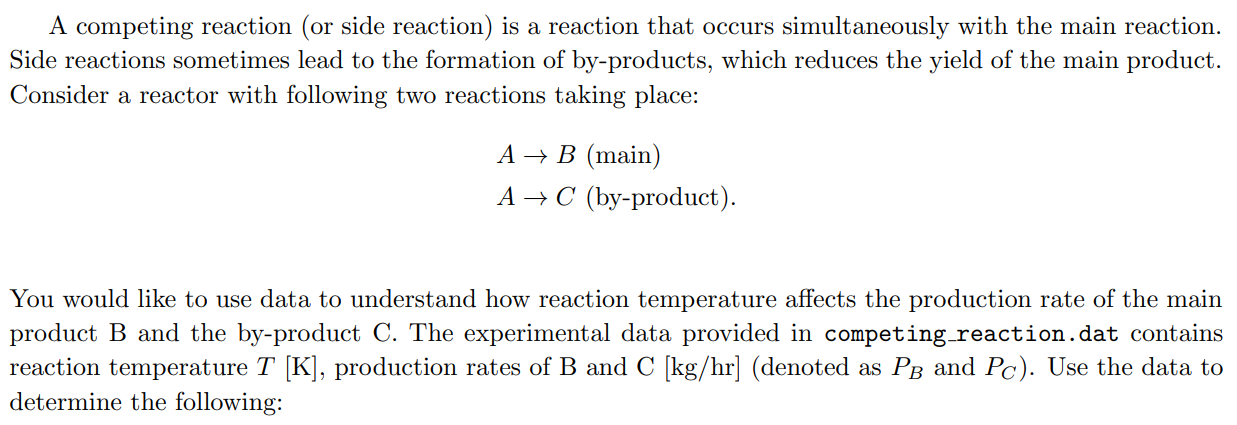

In [5]:
df = pd.read_csv('../Matlab/Data/competing_reaction.dat', delimiter='\s+', header=None, names=['temp', 'Pb', 'Pc'])
#temp is in Kelvin
#Pb and Pc are in kg/hr
df

,temp,Pb,Pc
0,-6.490138,13.414422,116.087730
1,12.213267,22.976530,123.080740
2,-6.781320,23.393881,119.218600
3,-9.891311,24.001839,119.471350
4,-6.849087,29.996655,105.535220
...,...,...,...
245,105.151740,101.682920,18.701727
246,100.700990,88.955001,45.633337
247,105.900420,101.140540,40.975756
248,101.681960,96.374204,40.497157


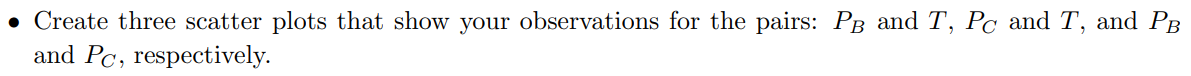

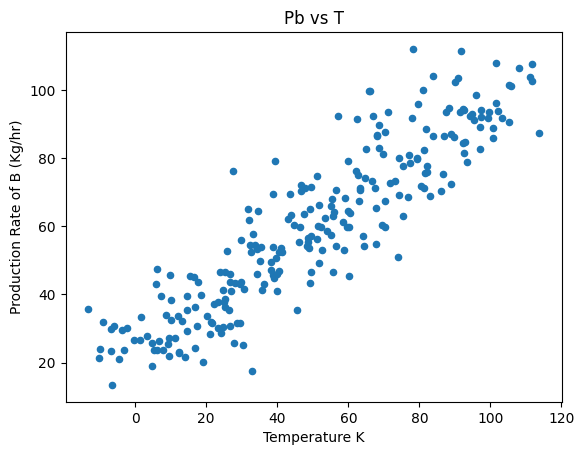

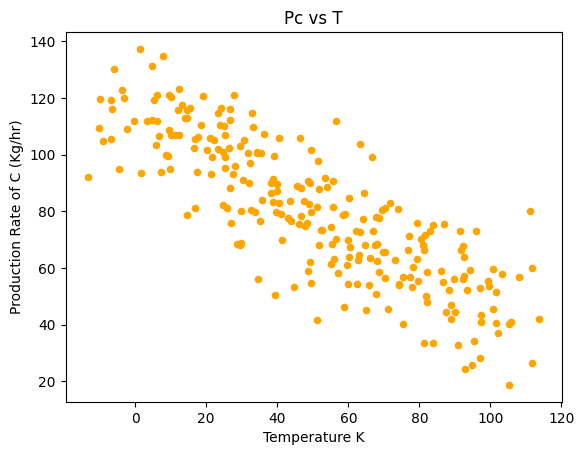

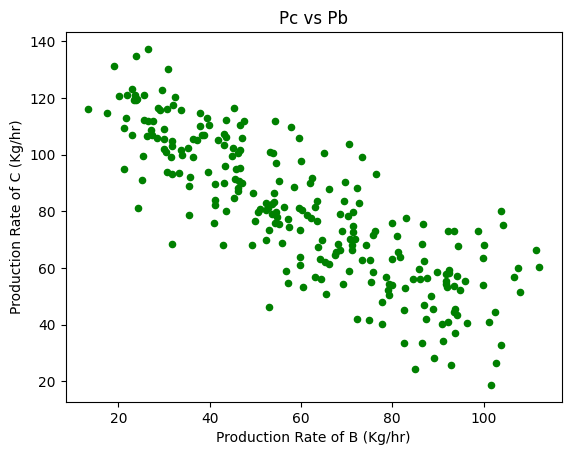

In [8]:
df.plot.scatter(x='temp', y='Pb', title='Pb vs T', xlabel='Temperature K', ylabel='Production Rate of B (Kg/hr)')
plt.show()

df.plot.scatter(x='temp', y='Pc', title='Pc vs T', xlabel='Temperature K', ylabel='Production Rate of C (Kg/hr)', color='orange')
plt.show()

df.plot.scatter(x='Pb', y='Pc', title='Pc vs Pb', xlabel='Production Rate of B (Kg/hr)', ylabel='Production Rate of C (Kg/hr)', color='green')
plt.show()

Okay, let's talk about what we're seeing.   
As we increase the temp, we produce more B, which is good, because we want more B (Figure 1).     
Also good, as we increase the temp, we also get less of C, which we don't want (Figure 2).  
Also we can see that there's a relationship between how much B and how much C we get (Figure 3).   
This makes sense because if we go from A->C, then we can't go A->B.   

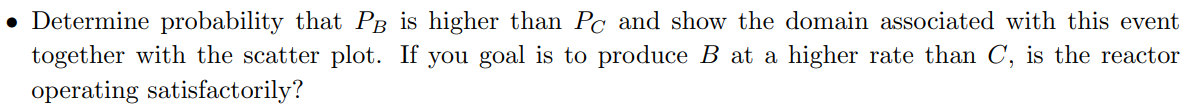

To find the total, I'm going to just find all the poins where Pb is bigger and add them up.  
Then I'm going to divide that by the total number of measurements.   
Then I'm going to make a scatterplot and to highlight the domain associated with the event where Pb is bigger than Pc, I'm going to color those points green.   

Probability of Pb > Pc: 0.384


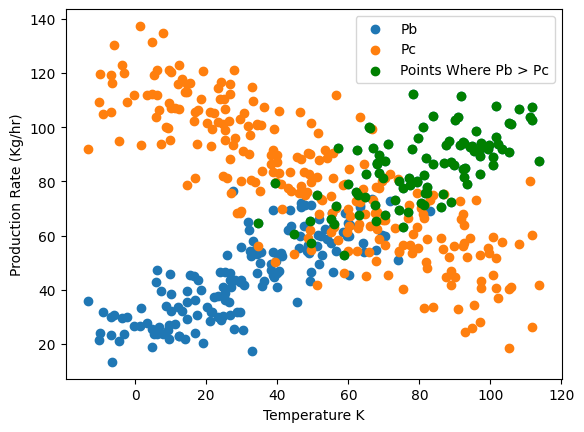

In [30]:
pb_bigger = (df['Pb'] > df['Pc']).sum()
total = len(df['Pb'])
prob_bigger_pb = pb_bigger / total

print(f'Probability of Pb > Pc: {prob_bigger_pb}')


plt.scatter(df['temp'], df['Pb'], label='Pb')
plt.scatter(df['temp'], df['Pc'], label='Pc')
bigger_pb_query = df.query('Pb > Pc')
plt.scatter(bigger_pb_query['temp'], bigger_pb_query['Pb'], label='Points Where Pb > Pc', color='green')

plt.xlabel('Temperature K')
plt.ylabel('Production Rate (Kg/hr)')
plt.legend()
plt.show()

This reactor is not operating satisfactorily because we are producing way more C than B currently.   
There are not very many green dots compared to all the rest.  

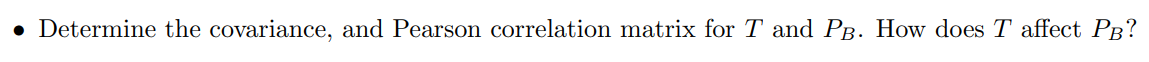

So I'm going to use the inbuild Pandas methods for determining these matricies.   
.corr() automatically gives us the pearson, but I'm just passing it in just to make sure

In [35]:
T_Pb_cov = df[['temp', 'Pb']].cov()
T_Pb_corr = df[['temp', 'Pb']].corr(method='pearson')

print(f'Covariance of T and Pb:\n{T_Pb_cov}\n')
print(f'Correlation of T and Pb:\n{T_Pb_corr}')

Covariance of T and Pb:
            temp          Pb
temp  993.656573  695.393446
Pb    695.393446  596.132394

Correlation of T and Pb:
          temp        Pb
temp  1.000000  0.903527
Pb    0.903527  1.000000


A change in the temp drastically affects Pb.  
Covariance is super high, and correlation is crazy high as well.  
So they are bascially directly related.   

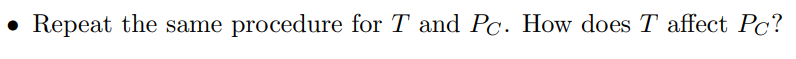

In [36]:
T_Pc_cov = df[['temp', 'Pc']].cov()
T_Pc_corr = df[['temp', 'Pc']].corr(method='pearson')

print(f'Covariance of T and Pc:\n{T_Pc_cov}\n')
print(f'Correlation of T and Pc:\n{T_Pc_corr}')

Covariance of T and Pc:
            temp          Pc
temp  993.656573 -660.577249
Pc   -660.577249  631.366413

Correlation of T and Pc:
          temp        Pc
temp  1.000000 -0.833997
Pc   -0.833997  1.000000


T and Pc have negative covariance, and negative correlation.   
The correlation isn't as strong as T and Pb, but it still is pretty strong.  

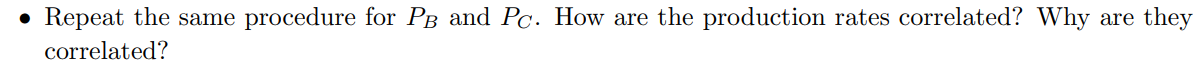

In [37]:
Pb_Pc_cov = df[['Pb', 'Pc']].cov()
Pb_Pc_corr = df[['Pb', 'Pc']].corr(method='pearson')

print(f'Covariance of Pb and Pc:\n{Pb_Pc_cov}\n')
print(f'Correlation of Pb and Pc:\n{Pb_Pc_corr}')

Covariance of Pb and Pc:
            Pb          Pc
Pb  596.132394 -506.455977
Pc -506.455977  631.366413

Correlation of Pb and Pc:
          Pb        Pc
Pb  1.000000 -0.825524
Pc -0.825524  1.000000


There's a strong negative covariance and correlation between Pb and Pc.   
This makes sense. The more of C we produce, the less B we can produce.   

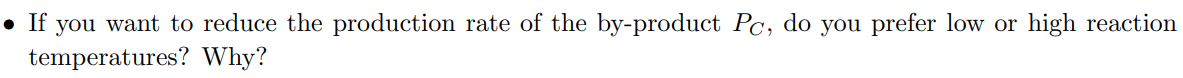

Crank that temp up.   
We prefer high temperatures.   
C's rate of production goes down at higher temps, and B's rate goes up.   
It's a no brainer. If heating costs aren't too bad, and our reactor can take it- based on the data, I say we increase the operating temp.

## Problem 2: Wind Turbines

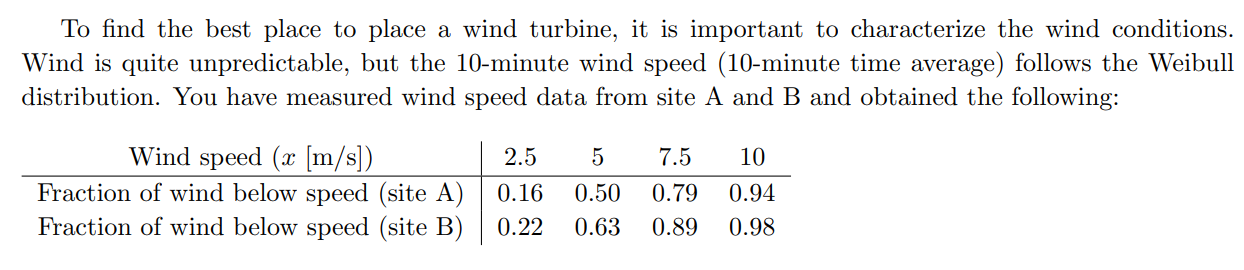

I'm going to put the data into a Pandas dataframe becuase I love Pandas.

In [38]:
#generate dataframe
df2 = pd.DataFrame({'wind_speed': [2.5, 5, 7.5, 10], 'A_frac_below': [0.16, 0.50, 0.79, 0.94], 'B_frac_below': [0.22, 0.63, 0.89, 0.98]})


   wind_speed  A_frac_below  B_frac_below
0         2.5          0.16          0.22
1         5.0          0.50          0.63
2         7.5          0.79          0.89
3        10.0          0.94          0.98


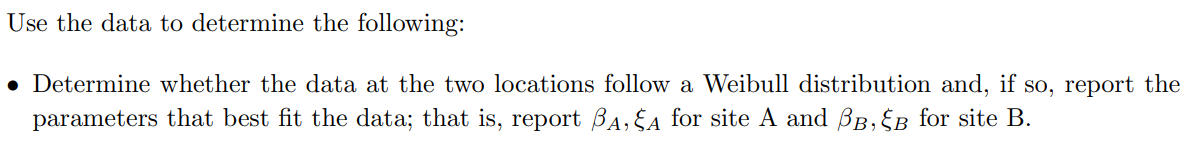

First I'll import the stuff I need. 

In [2]:
from scipy.stats import weibull_min
from scipy.optimize import curve_fit

I'm getting the Weibull from the book.

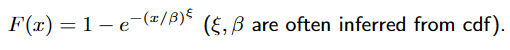

Now I'm just going to fit using scipi.optimize.curvefit()   
And just to make sure I'm not messing it up, I'm going to plot the CDFs with the data.  

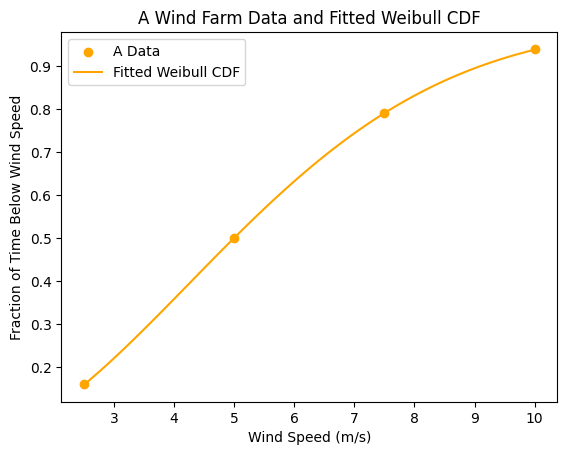

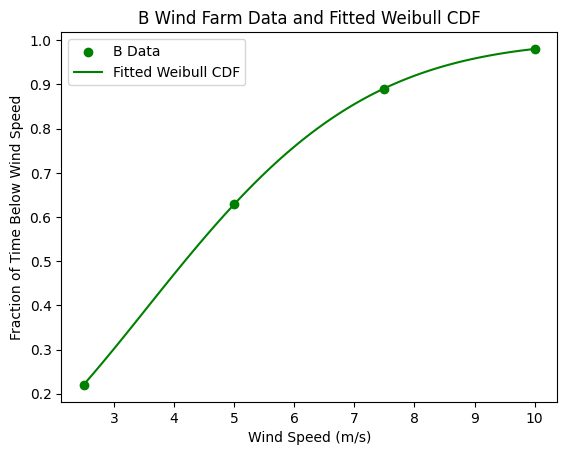

In [7]:
def cdf_weibull(x, xi, beta):
    return 1 - np.exp(-(x / beta)**xi)

temp_A, _ = curve_fit(cdf_weibull, df2['wind_speed'], df2['A_frac_below'])
xi_A, b_A = temp_A

temp_B, _ = curve_fit(cdf_weibull, df2['wind_speed'], df2['B_frac_below'])
xi_B, b_B = temp_B

plt.scatter(df2['wind_speed'], df2['A_frac_below'], label='A Data', color='orange')
x = np.linspace(min(df2['wind_speed']), max(df2['wind_speed']), 100)
plt.plot(x, cdf_weibull(x, xi_A, b_A), label='Fitted Weibull CDF', color='orange')
plt.title('A Wind Farm Data and Fitted Weibull CDF')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Fraction of Time Below Wind Speed')
plt.legend()
plt.show()

plt.scatter(df2['wind_speed'], df2['B_frac_below'], label='B Data', color='green')
plt.plot(x, cdf_weibull(x, xi_B, b_B), label='Fitted Weibull CDF', color='green')
plt.title('B Wind Farm Data and Fitted Weibull CDF')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Fraction of Time Below Wind Speed')
plt.legend()
plt.show()

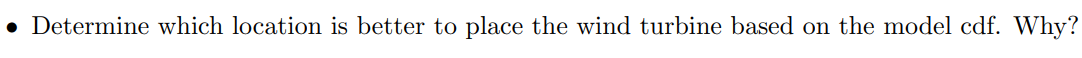

Okay. I think I'll combine the plots to look at how they overlap.  

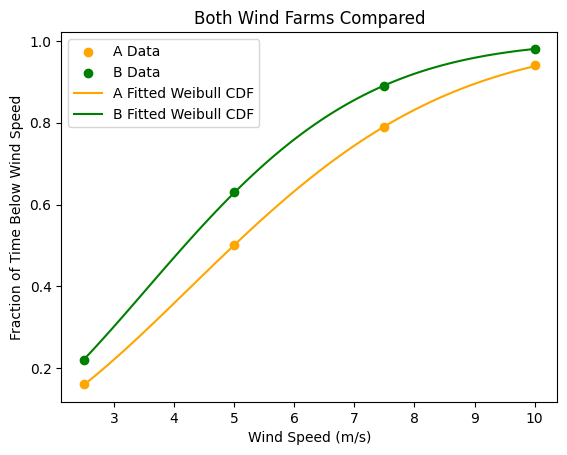

In [8]:
plt.scatter(df2['wind_speed'], df2['A_frac_below'], label='A Data', color='orange')
plt.scatter(df2['wind_speed'], df2['B_frac_below'], label='B Data', color='green')
plt.plot(x, cdf_weibull(x, xi_A, b_A), label='A Fitted Weibull CDF', color='orange')
plt.plot(x, cdf_weibull(x, xi_B, b_B), label='B Fitted Weibull CDF', color='green')
plt.title('Both Wind Farms Compared')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Fraction of Time Below Wind Speed')
plt.legend()
plt.show()

Now this is where we have to think in opposites because the Y axis the the fraction of the time that is below a certain wind speed.   
So the one that is higher up actually spends more time below that wind speed.   
I don't love that- but that's the way the problem was posed.   
So since B is higher, that means it spends a larger amount of time below the wind speeds listed on the x-axis.  
So B isn't as good of a choice.   
  
The Site A Wind Farm looks like a better choice.     
(I really hope I didn't mix that up.)

In [9]:
from scipy.integrate import quad

def pdf_weibull(x, xi, beta):
    return (xi / beta) * (x / beta)**(xi - 1) * np.exp(-(x / beta)**xi)

# Define the integrand for calculating the expected value
def integrand(x, xi, beta):
    return x * pdf_weibull(x, xi, beta)

# Define the range of integration (0 to infinity)
integration_range = (0, np.inf)

# Calculate the expected value for wind farm A
expected_value_A, _ = quad(integrand, *integration_range, args=(xi_A, b_A))

# Calculate the expected value for wind farm B
expected_value_B, _ = quad(integrand, *integration_range, args=(xi_B, b_B))

print("Expected Value for Wind Farm A:", expected_value_A)
print("Expected Value for Wind Farm B:", expected_value_B)

Expected Value for Wind Farm A: 5.316050925146339
Expected Value for Wind Farm B: 4.452781183630454


## Problem 3: Power Grid Signal

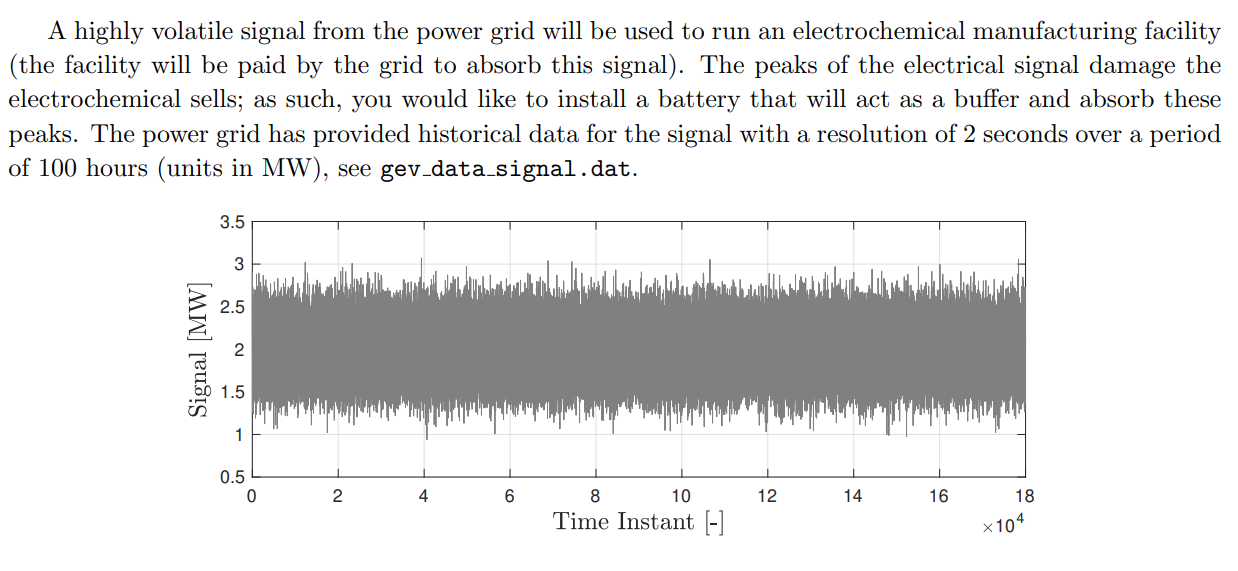

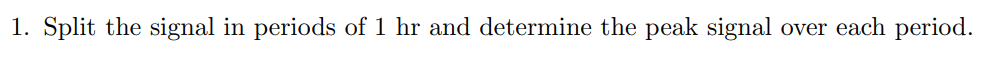

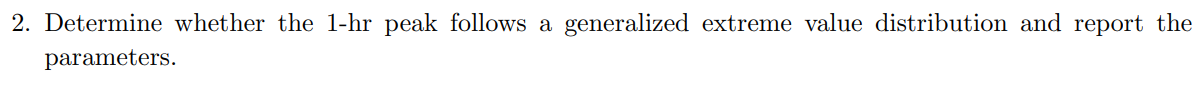

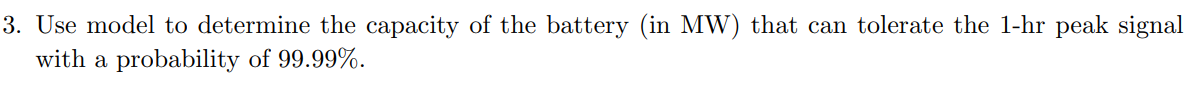

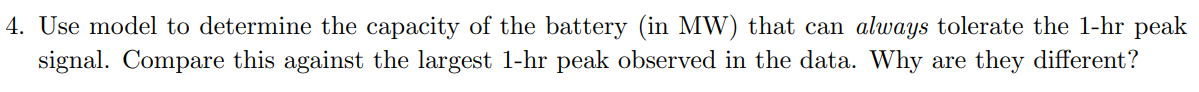